In [100]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [101]:
img_width, img_height = 150, 150

In [160]:
train_data_dir = 'Data/train'
validation_data_dir = 'Data/validation'
nb_train_samples = 2000
nb_validation_samples =800 
epochs = 20
batch_size = 16

In [161]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [170]:
nos_classes=2
model = Sequential()
model.add(Conv2D(50, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nos_classes))
model.add(Activation('softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 148, 148, 50)      1400      
_________________________________________________________________
activation_95 (Activation)   (None, 148, 148, 50)      0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 74, 74, 50)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 50)        22550     
_________________________________________________________________
activation_96 (Activation)   (None, 72, 72, 50)        0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 36, 36, 50)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 34, 34, 64)        28864     
__________

In [171]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [172]:
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [173]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [174]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [168]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')


Found 5000 images belonging to 2 classes.


In [ ]:
epochs = 1000
batch_size = 50
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples // batch_size,epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/1000
40/40 [==============================] - 256s 6s/step - loss: 0.7096 - acc: 0.4870 - val_loss: 0.6933 - val_acc: 0.4727
Epoch 2/1000
40/40 [==============================] - 231s 6s/step - loss: 0.6932 - acc: 0.4890 - val_loss: 0.6932 - val_acc: 0.4688
Epoch 3/1000
40/40 [==============================] - 220s 6s/step - loss: 0.6932 - acc: 0.4910 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/1000
40/40 [==============================] - 25747s 644s/step - loss: 0.6932 - acc: 0.5065 - val_loss: 0.6937 - val_acc: 0.4648
Epoch 5/1000
40/40 [==============================] - 254s 6s/step - loss: 0.6933 - acc: 0.4925 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 6/1000
40/40 [==============================] - 227s 6s/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 7/1000
40/40 [==============================] - 295s 7s/step - loss: 0.6931 - acc: 0.5120 - val_loss: 0.6926 - val_acc: 0.5469
Epoch 8/1000
40/40 [==============================] - 278s 7s/ste

In [76]:
model.save_weights("initialClassifier.h5")

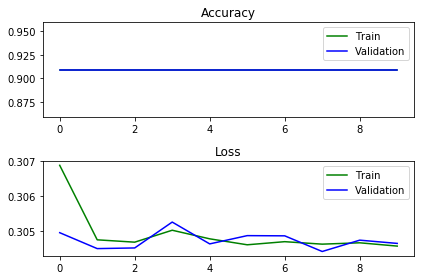

In [132]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()